# Computing spectrograms

Apart from a standard spectrogram, here called Seismic Spectral-Amplitude Measurement (SSAM), zizou also computes a sonogram and a filterbank. Both are based on the standard spectrogram but the former computes the power in half-octave band. The latter integrates energy within overlapping triangular windows within the frequency domain. The windows get wider with frequency which increases the relative power of lower-frequency elements of the original signal.

Zizou comes with two functions to plot spectrograms: `plot_ssam_plotly` and `plot_ssam_mpl`. The former uses the [plotly](https://plotly.com/python/) library and produces interactive plots that allow zooming and panning. The latter uses the [matplotlib](https://matplotlib.org/) library which produces static plots by default.

In [1]:
import datetime
import os
import shutil
import glob

import numpy as np
from obspy import UTCDateTime
import pandas as pd
import xarray as xr

import plotly.graph_objects as go
import plotly.express as px

from zizou.ssam import SSAM
from zizou.spectral_features import SpectralFeatures
from zizou.util import test_signal
from zizou.data import DataSource, FDSNWaveforms
from zizou.visualise import plot_ssam_plotly, plot_ssam_mpl

### Compute SSAM for a synthetic test case

In [2]:
test_trace = test_signal(offsets=[1000., 2000., 3000.],
                         frequencies=[1., 2., 5.],
                         amplitudes=[0.1, 1., 5.],
                         addchirp=True, sinusoid=True,
                         starttime=UTCDateTime(2020, 1, 1))

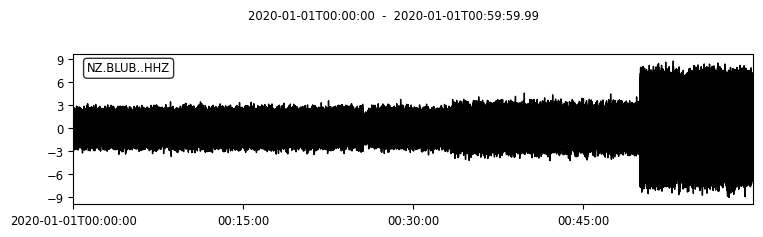

In [3]:
_ = test_trace.plot()

In [4]:
s = SSAM(interval=60, per_lap=0., nhob=8, fbfilters=16, timestamp='start')
spec = s.compute(test_trace)

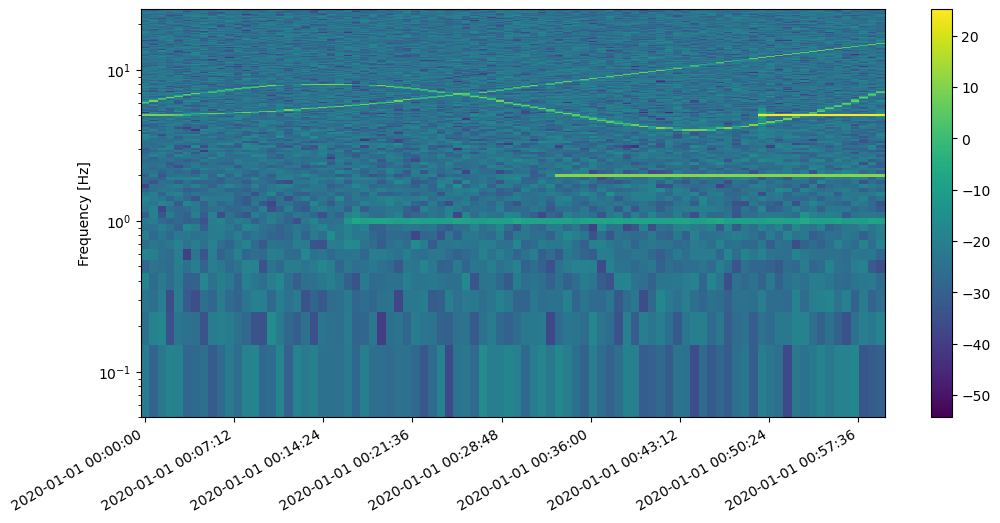

In [5]:
# plot_ssam_plotly(spec['ssam'], dbscale=True, log=True, canvas_dim=None)
_ = plot_ssam_mpl(spec['ssam'], dbscale=True, log=True, canvas_dim=None)

In [6]:
#plot_ssam_plotly(spec['sonogram'], dbscale=False, log=False)
_ = plot_ssam_mpl(spec['sonogram'], dbscale=False, log=False)

In [7]:
#plot_ssam_plotly(spec['filterbank'], dbscale=True, log=True, canvas_dim=None)
_ = plot_ssam_mpl(spec['filterbank'], dbscale=True, log=True, canvas_dim=None)

#### Synthetic trace with gaps

In [8]:
test_trace2 = test_signal(gaps=True)

In [9]:
_ = test_trace2.plot()

In [10]:
spec = s.compute(test_trace2)

/workspaces/zizou/src/zizou/util.py:78: RuntimeWarning: Mean of empty slice
  return x - np.nanmean(x, axis=axis, keepdims=True)


In [11]:
# plot_ssam_plotly(s.feature['ssam'], dbscale=True)
_ = plot_ssam_mpl(spec['ssam'], dbscale=True)

In [12]:
#plot_ssam_plotly(spec['filterbank'], dbscale=True, log=True, canvas_dim=None)
_ = plot_ssam_mpl(spec['filterbank'], dbscale=True, log=True, canvas_dim=None)

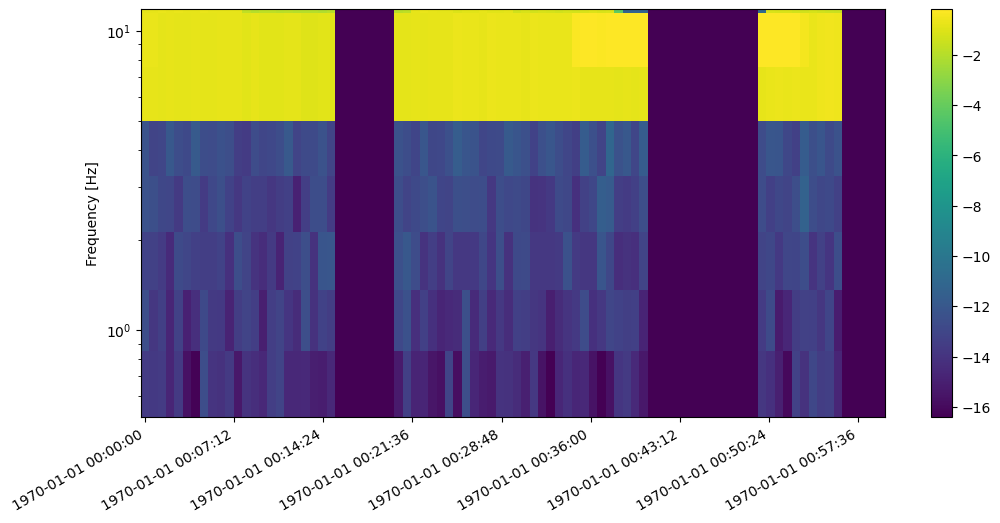

In [13]:
# plot_ssam_plotly(spec['sonogram'], log=True, canvas_dim=None)
_ = plot_ssam_mpl(spec['sonogram'], log=True, canvas_dim=None)

### Test a single day of real data
To test it with some real data let's have a look at the seismic recording of the 2019 Whakaari eruption.

In [14]:
starttime = UTCDateTime('2019-12-08T12:00:00')
endtime = starttime+86400.
client = FDSNWaveforms(url='https://service.geonet.org.nz')
ds = DataSource(clients=[client])
trace = next(ds.get_waveforms('NZ', 'WIZ', '10', 'HHZ', starttime, endtime, cache=True))

In [15]:
s = SSAM(interval=60,timestamp='start', frequencies=np.arange(0, 25.1, .1),
         resample_int=(None, '10min'), smooth=None, nhob=10)
xds = s.compute(trace)

In [16]:
#plot_ssam_plotly(xds['ssam'], dbscale=True, log=True)
_ = plot_ssam_mpl(xds['ssam'], dbscale=True, log=True)

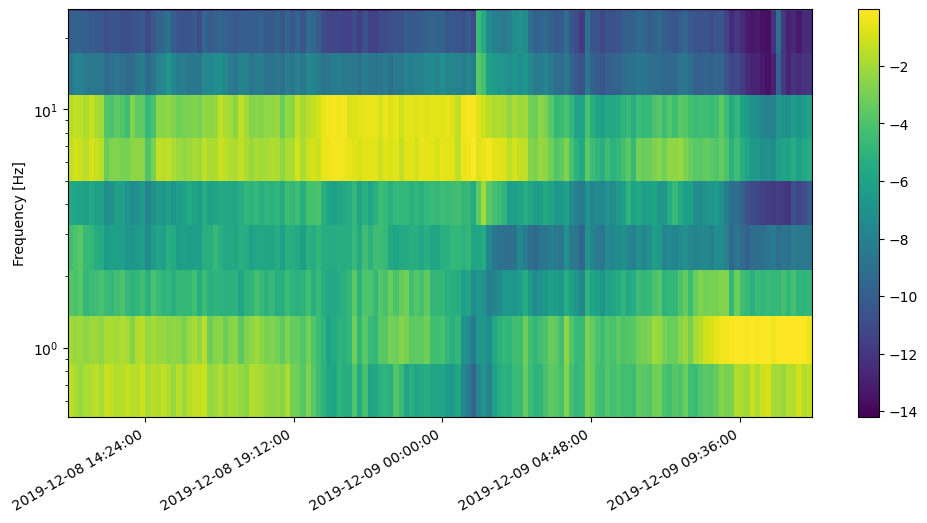

In [17]:
#plot_ssam_plotly(xds['sonogram'], canvas_dim=None, log=True)
_ = plot_ssam_mpl(xds['sonogram'], canvas_dim=None, log=True)

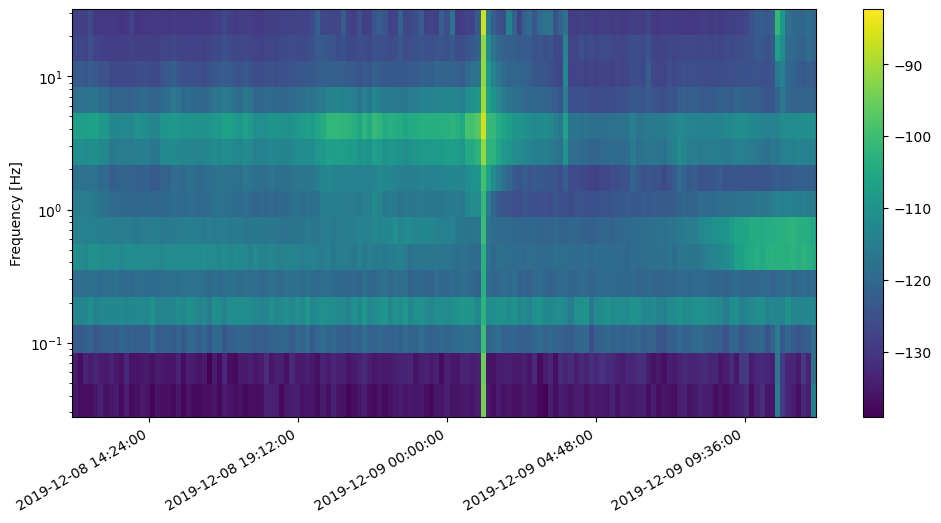

In [18]:
#plot_ssam_plotly(xds['filterbank'], dbscale=True, canvas_dim=None, log=True)
_ = plot_ssam_mpl(xds['filterbank'], dbscale=True, canvas_dim=None, log=True)